# Day 1 to 10 practice

## Import Libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge

## Get Data

In [4]:
import numpy as np
import pandas as pd

np.random.seed(42)
n = 1200

# Numeric features
area = np.random.normal(1200, 350, n)
rooms = np.random.randint(1, 6, n).astype(float)
age = np.random.randint(0, 50, n)

# Categorical features
location = np.random.choice(["urban", "suburban", "rural"], n)
property_type = np.random.choice(["apartment", "house"], n)

# Introduce missing values
area[np.random.choice(n, 80, replace=False)] = np.nan
rooms[np.random.choice(n, 50, replace=False)] = np.nan
location[np.random.choice(n, 40, replace=False)] = np.nan

# Target (price)
price = (
    np.nan_to_num(area, nan=1200) * 300 +
    np.nan_to_num(rooms, nan=3) * 50000 -
    age * 1000 +
    np.where(location == "urban", 200000, 0) +
    np.where(location == "suburban", 100000, 0) +
    np.where(property_type == "house", 150000, 0) +
    np.random.normal(0, 50000, n)
)

df = pd.DataFrame({
    "area": area,
    "rooms": rooms,
    "age": age,
    "location": location,
    "property_type": property_type,
    "price": price
})

df.head()


,area,rooms,age,location,property_type,price
0,1373.849954,5.0,37,urban,house,972352.207769
1,1151.607495,2.0,10,rural,apartment,416352.579233
2,1426.690988,3.0,32,urban,house,877052.209083
3,1733.060450,5.0,23,urban,apartment,982720.422375
4,1118.046319,NaN,22,suburban,apartment,574054.887998


## Step 1 — Define X and y (RAW)

In [5]:
X = df.drop('price', axis = 1)
y = df['price']

## Step 2 — Train/Test Split (LOCK TEST SET)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state=42
)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((960, 5), (240, 5), (960,), (240,))

## EDA

In [13]:
X_train.corr()

C:\Users\ayush\AppData\Local\Temp\ipykernel_15412\131534602.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_train.corr()


,area,rooms,age
area,1.000000,-0.017487,0.011873
rooms,-0.017487,1.000000,-0.027439
age,0.011873,-0.027439,1.000000


In [15]:
X_train.describe()

,area,rooms,age
count,897.000000,914.000000,960.000000
mean,1212.472970,3.078775,24.355208
std,330.150847,1.419751,14.555774
min,203.010083,1.000000,0.000000
25%,998.463616,2.000000,12.000000
50%,1221.080573,3.000000,24.000000
75%,1430.490495,4.000000,36.000000
max,2152.059208,5.000000,49.000000


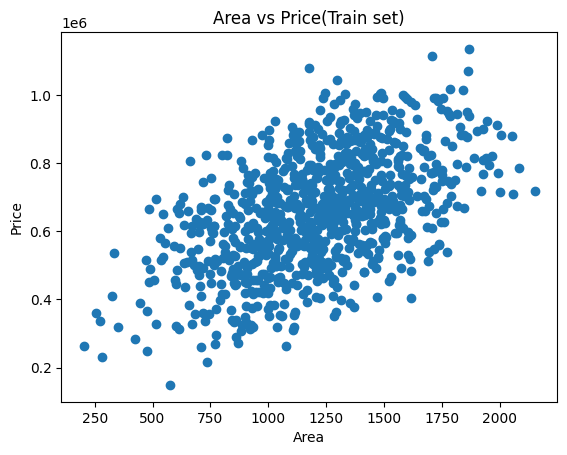

In [30]:
plt.scatter(X_train['area'], y_train)
plt.xlabel("Area")
plt.ylabel('Price')
plt.title("Area vs Price(Train set)");

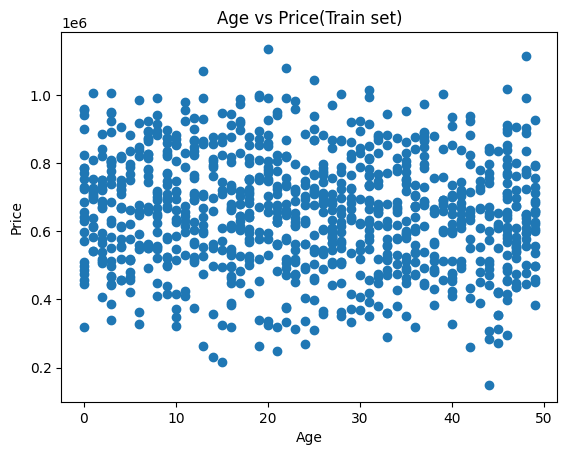

In [32]:
plt.scatter(X_train['age'], y_train)
plt.xlabel("Age")
plt.ylabel('Price')
plt.title("Age vs Price(Train set)");

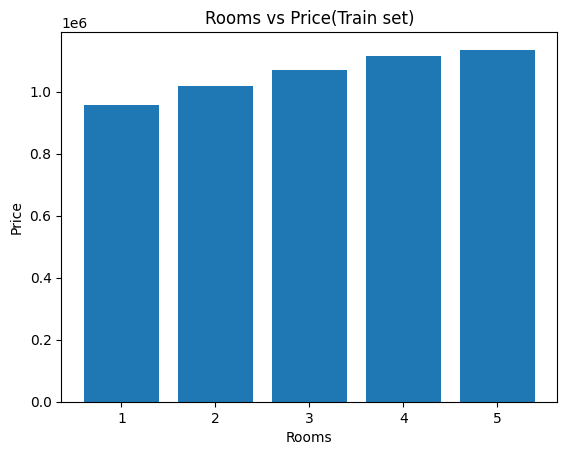

In [34]:
plt.bar(X_train['rooms'], y_train)
plt.xlabel("Rooms")
plt.ylabel('Price')
plt.title("Rooms vs Price(Train set)");

## Step 3 — Pipeline (Imputation + Encoding + Scaling + Model)

In [36]:
num_features = ['area', 'rooms', 'age']
cat_features = ['location', 'property_type']

In [43]:
num_imputer = SimpleImputer(strategy = 'median')
cat_imputer = SimpleImputer(strategy='most_frequent')

### Imputation

In [44]:
X_train[num_features] = num_imputer.fit_transform(X_train[num_features])
X_test[num_features] = num_imputer.transform(X_test[num_features])
X_train[cat_features] = cat_imputer.fit_transform(X_train[cat_features])
X_test[cat_features] = cat_imputer.transform(X_test[cat_features])

### Encode Categorical Variables

In [47]:
encoder = OneHotEncoder(handle_unknown = 'ignore', sparse_output = False)

X_train_cat =encoder.fit_transform(X_train[cat_features])
X_test_cat = encoder.transform(X_test[cat_features])

### Scale Numeric Features

In [48]:
scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[num_features])
X_test_num = scaler.transform(X_test[num_features])

### Combine Numeric + Categorical Features

In [50]:
X_train_final = np.hstack([X_train_num, X_train_cat])
X_test_final = np.hstack([X_test_num, X_test_cat])

## Fit a Model

In [51]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)
model.fit(X_train_final, y_train)

Ridge()